In [13]:
import geopandas as gpd
import pandas as pd

Load data

In [2]:
df_countries_hr = gpd.read_file('WB_countries_Admin0.geojson')
df_countries_hr.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."


In [3]:
df_countries_hr.columns

Index(['FID', 'OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN',
       'FORMAL_FR', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR',
       'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [ ]:
df_countries_hr.CONTINENT.unique()

Dissolve into continents

In [7]:
df_continents = df_countries_hr.dissolve(by='CONTINENT').reset_index(drop=False)
df_continents.head()

,CONTINENT,geometry,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area
0,Africa,"MULTIPOLYGON (((37.662 -46.829, 37.695 -46.822...",12,13,Admin-0 country,2,Sovereign country,Federal Democratic Republic of Ethiopia,,105350020,...,Эфиопия,Etiopien,Etiyopya,Ethiopia,埃塞俄比亚,Ethiopia,None,AFR,47.375136,92.707782
1,Asia,"MULTIPOLYGON (((96.914 -12.195, 96.902 -12.200...",0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,...,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608
2,Europe,"MULTIPOLYGON (((3.457 -54.390, 3.478 -54.397, ...",20,21,Admin-0 country,2,Country,French Republic,,67106161,...,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818
3,North America,"MULTIPOLYGON (((-160.030 -0.376, -160.009 -0.3...",26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,...,Коста-Рика,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326
4,Oceania,"MULTIPOLYGON (((158.866 -54.750, 158.838 -54.7...",155,156,Admin-0 country,2,Sovereign country,Independent State of Papua New Guinea,,6909701,...,Папуа-Новая Гвинея,Papua Nya Guinea,Papua Yeni Gine,Papua New Guinea,巴布亚新几内亚,Papua New Guinea,None,EAP,108.308260,38.043668


In [8]:
df_north_america = df_continents[df_continents.CONTINENT == 'North America'].reset_index(drop=True)
df_north_america

,CONTINENT,geometry,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area
0,North America,"MULTIPOLYGON (((-160.02998 -0.37615, -160.0089...",26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,...,Коста-Рика,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326


Find US Territories

In [9]:
df_countries_hr.FORMAL_EN.unique()

array(['Republic of Indonesia', 'Malaysia', 'Republic of Chile',
       'Plurinational State of Bolivia', 'Republic of Peru',
       'Argentine Republic', 'Republic of Cyprus', 'Republic of India',
       "People's Republic of China", 'State of Israel',
       'West Bank and Gaza', 'Lebanese Republic',
       'Federal Democratic Republic of Ethiopia',
       'Republic of South Sudan', 'Federal Republic of Somalia',
       'Republic of Kenya', 'Islamic Republic of Pakistan',
       'Republic of Malawi', 'United Republic of Tanzania',
       'Syrian Arab Republic', 'French Republic', 'Republic of Suriname',
       'Co-operative Republic of Guyana', 'Republic of Korea',
       "Democratic People's Republic of Korea", 'Kingdom of Morocco',
       'Republic of Costa Rica', 'Republic of Nicaragua',
       'Republic of the Congo', 'Democratic Republic of the Congo',
       'Kingdom of Bhutan', 'Ukraine', 'Republic of Belarus',
       'Republic of Namibia', 'Republic of South Africa',
       '

In [12]:
us_territories = ['American Samoa', 
                  'Commonwealth of Puerto Rico', 
                  'Virgin Islands of the United States', 
                  'Commonwealth of the Northern Mariana Islands',
                  'Territory of Guam']
df_us_territories = df_countries_hr[df_countries_hr.FORMAL_EN.isin(us_territories)].reset_index(drop=True)
df_us_territories.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,192,193,Admin-0 country,2,Dependency,Virgin Islands of the United States,,107268,9,3792.0,...,Amerikanska Jungfruöarna,ABD Virjin Adaları,Quần đảo Virgin thuộc Mỹ,美屬維爾京群島,U.S. Virgin Islands (US),Name in italic,Other,1.705456,0.030265,"MULTIPOLYGON (((-64.55940 17.75161, -64.55940 ..."
1,194,195,Admin-0 country,2,Dependency,Commonwealth of Puerto Rico,,3351827,12,131000.0,...,Puerto Rico,Porto Riko,Puerto Rico,波多黎各,Puerto Rico (US),Name in italic,Other,6.091411,0.769282,"MULTIPOLYGON (((-67.85587 18.11469, -67.86189 ..."
2,227,228,Admin-0 country,2,Dependency,American Samoa,,51504,8,711.0,...,Amerikanska Samoa,Amerikan Samoası,Samoa thuộc Mỹ,美屬薩摩亞,American Samoa (US),Name in italic,Other,1.073705,0.015101,"MULTIPOLYGON (((-170.59101 -14.26483, -170.620..."
3,229,230,Admin-0 country,2,Dependency,Territory of Guam,,167358,9,4882.0,...,Guam,Guam,Guam,關島,Guam (US),Name in italic,Other,1.178241,0.047094,"POLYGON ((144.88640 13.64020, 144.88063 13.654..."
4,230,231,Admin-0 country,2,Dependency,Commonwealth of the Northern Mariana Islands,,52263,8,682.0,...,Nordmarianerna,Kuzey Mariana Adaları,Quần đảo Bắc Mariana,北马里亚纳群岛,Northern Mariana Islands (US),Name in italic,Other,2.905005,0.048995,"MULTIPOLYGON (((145.20574 14.18138, 145.18637 ..."


In [17]:
# manually remove duplicates in North America
df_us_territories_temp = df_us_territories[df_us_territories.CONTINENT != 'North America'].copy()
# Stack the dataframes
df_north_america_opera = pd.concat([df_north_america, df_us_territories_temp], axis=0).reset_index(drop=True)
df_north_america_opera.head()

,CONTINENT,geometry,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area
0,North America,"MULTIPOLYGON (((-160.02998 -0.37615, -160.0089...",26,27,Admin-0 country,2,Sovereign country,Republic of Costa Rica,,4930258,...,Коста-Рика,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,Costa Rica,Costa Rica,LCR,18.380467,4.217326
1,Oceania,"MULTIPOLYGON (((-170.59101 -14.26483, -170.620...",227,228,Admin-0 country,2,Dependency,American Samoa,,51504,...,Американское Самоа,Amerikanska Samoa,Amerikan Samoası,Samoa thuộc Mỹ,美屬薩摩亞,American Samoa (US),Name in italic,Other,1.073705,0.015101
2,Oceania,"POLYGON ((144.88640 13.64020, 144.88063 13.654...",229,230,Admin-0 country,2,Dependency,Territory of Guam,,167358,...,Гуам,Guam,Guam,Guam,關島,Guam (US),Name in italic,Other,1.178241,0.047094
3,Oceania,"MULTIPOLYGON (((145.20574 14.18138, 145.18637 ...",230,231,Admin-0 country,2,Dependency,Commonwealth of the Northern Mariana Islands,,52263,...,Северные Марианские острова,Nordmarianerna,Kuzey Mariana Adaları,Quần đảo Bắc Mariana,北马里亚纳群岛,Northern Mariana Islands (US),Name in italic,Other,2.905005,0.048995


In [18]:
df_north_america_opera.to_file('north_america_for_opera.geojson', driver='GeoJSON')

<AxesSubplot:>

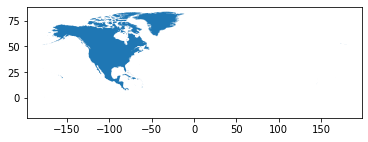

In [19]:
df_north_america_opera.plot()